## Fan attendance at NFL Games
**02806 Social data analysis and visualization**

**Group 36**

**Group members:**   
Birkir Fanndal Sturluson s232729 <br>
Brynjar Karl Ævarsson s232736 <br>
Védís Sigríður Ingvarsdóttir <br>

https://chat.openai.com/share/9fdb714e-8c6b-438e-a521-fd93acdc649c


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [41]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [42]:
games

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999.0,REG,1.0,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999.0,REG,1.0,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999.0,REG,1.0,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999.0,REG,1.0,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999.0,REG,1.0,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,2023_20_TB_DET,2023.0,DIV,20.0,2024-01-21,Sunday,15:00,TB,23.0,DET,...,NaN,00-0034855,00-0033106,Baker Mayfield,Jared Goff,Todd Bowles,Dan Campbell,Bill Vinovich,DET00,Ford Field
6702,2023_20_KC_BUF,2023.0,DIV,20.0,2024-01-21,Sunday,18:30,KC,27.0,BUF,...,11.0,00-0033873,00-0034857,Patrick Mahomes,Josh Allen,Andy Reid,Sean McDermott,Shawn Hochuli,BUF00,New Era Field
6703,2023_21_KC_BAL,2023.0,CON,21.0,2024-01-28,Sunday,15:00,KC,17.0,BAL,...,7.0,00-0033873,00-0034796,Patrick Mahomes,Lamar Jackson,Andy Reid,John Harbaugh,Shawn Smith,BAL00,M&T Bank Stadium
6704,2023_21_DET_SF,2023.0,CON,21.0,2024-01-28,Sunday,18:30,DET,31.0,SF,...,5.0,00-0033106,00-0037834,Jared Goff,Brock Purdy,Dan Campbell,Kyle Shanahan,Clete Blakeman,SFO01,Levi's Stadium


In [43]:
# Dictionary to map team names to abbreviations
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'LV',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)



In [44]:
game_score = games
team_data = game_attendance

game_score["gameday"] = pd.to_datetime(game_score['gameday'])
game_score['year'] = game_score['gameday'].dt.year


# Filter game_score for the years 2000 to 2019
game_score_filtered = game_score[(game_score['year'] >= 2000) & (game_score['year'] <= 2019)]

# Filter team_data for the years 2000 to 2019
team_data_filtered = team_data[(team_data['year'] >= 2000) & (team_data['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)


# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')

# # Select only the necessary columns
# result = merged_data[['home_team', 'week', 'year', 'weekly_attendance']]

# # Renaming the columns for clarity
# result.rename(columns={'home_team': 'team'}, inplace=True)



C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\458661049.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_name'], right_on=["Team"], how='inner')

In [46]:
result = final_data[["game_id","season","week","gameday","weekday","wind","temp","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude","home_qb_name","away_qb_name","home_coach","away_coach" ]]

In [47]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\3983529507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\3983529507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
# SD and LAC THE SAME team
team_mapping = {
    'SD': 'LAC',
    # Add other mappings as necessary
}

# STL Land LA THE SAME team
team_mapping2 = {
    'STL': 'LA',
    # Add other mappings as necessary
}

In [50]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)

result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)

result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

In [51]:
# Assuming your DataFrame is named result
# Creating a new column 'stadium_name' that combines team abbreviation and 'Stadium' for each stadium name
result['stadium_name'] = result['team_abbr'] + ' Stadium'

# Renaming the stadium name for shared location of NYG/NYJ
result.loc[result['team_abbr'].isin(['NYG', 'NYJ']), 'stadium_name'] = 'NYG/NYJ Stadium'

# Dropping the original 'stadium' column
result.drop(columns=['stadium'], inplace=True)

# Displaying the updated DataFrame
result

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,Team,longitude,latitude,home_qb_name,away_qb_name,home_coach,away_coach,winning_team,home_team_win,stadium_name
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Bills,-78.786978,42.773739,Rob Johnson,Steve McNair,Wade Phillips,Jeff Fisher,BUF,True,BUF Stadium
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Bills,-78.786978,42.773739,Rob Johnson,Brett Favre,Wade Phillips,Mike Sherman,BUF,True,BUF Stadium
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Bills,-78.786978,42.773739,Rob Johnson,Peyton Manning,Wade Phillips,Jim Mora,IND,False,BUF Stadium
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Bills,-78.786978,42.773739,Rob Johnson,Jim Harbaugh,Wade Phillips,Mike Riley,BUF,True,BUF Stadium
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Bills,-78.786978,42.773739,Doug Flutie,Vinny Testaverde,Wade Phillips,Al Groh,BUF,True,BUF Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,2019_06_PIT_LAC,2019,6,2019-10-13,Sunday,9.0,71.0,LAC,PIT,17.0,...,Chargers,-117.119525,32.783117,Philip Rivers,Devlin Hodges,Anthony Lynn,Mike Tomlin,PIT,False,LAC Stadium
4531,2019_09_GB_LAC,2019,9,2019-11-03,Sunday,2.0,79.0,LAC,GB,26.0,...,Chargers,-117.119525,32.783117,Philip Rivers,Aaron Rodgers,Anthony Lynn,Matt LaFleur,LAC,True,LAC Stadium
4532,2019_11_KC_LAC,2019,11,2019-11-18,Monday,7.0,67.0,LAC,KC,17.0,...,Chargers,-117.119525,32.783117,Philip Rivers,Patrick Mahomes,Anthony Lynn,Andy Reid,KC,False,LAC Stadium
4533,2019_15_MIN_LAC,2019,15,2019-12-15,Sunday,14.0,64.0,LAC,MIN,10.0,...,Chargers,-117.119525,32.783117,Philip Rivers,Kirk Cousins,Anthony Lynn,Mike Zimmer,MIN,False,LAC Stadium


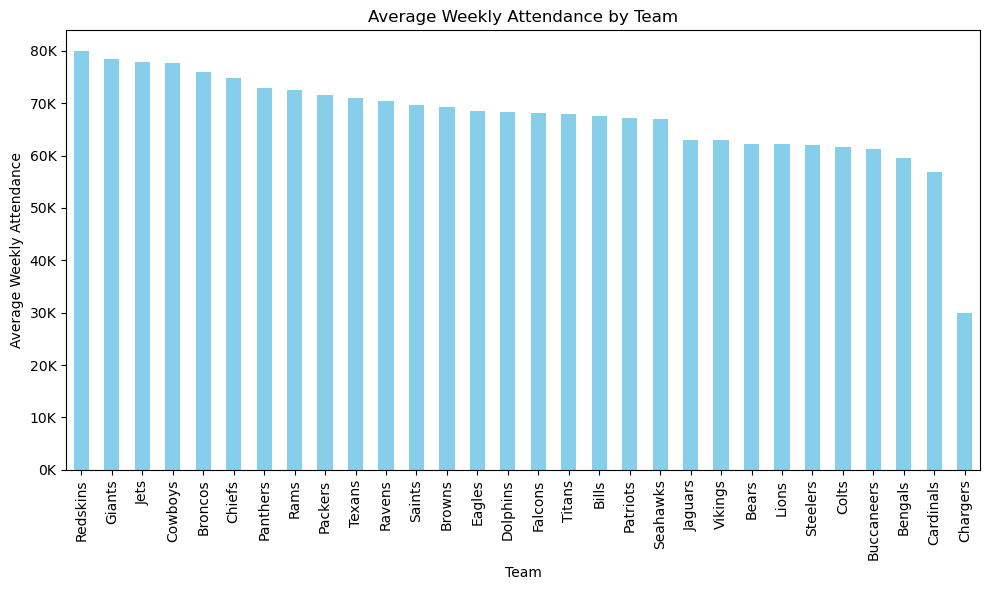

In [52]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

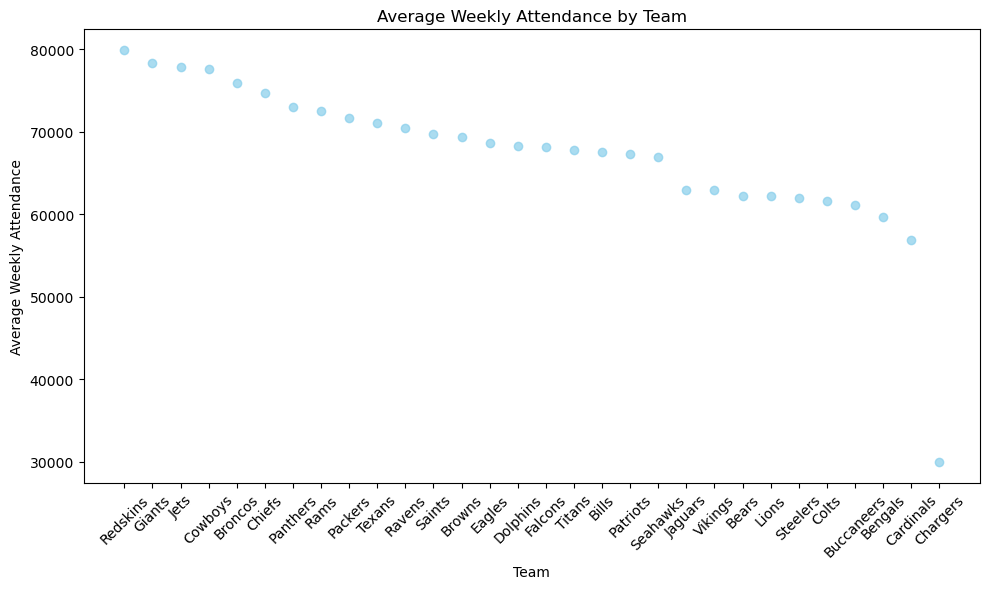

In [53]:
# Generate x and y values for the scatter plot
teams = average_attendance.index
average_attendances = average_attendance.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(teams, average_attendances, color='skyblue', alpha=0.7)

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [54]:
#Calculate the number of wins for each team
home_wins = result[result['home_score'] > result['away_score']]['home_team'].value_counts()
away_wins = result[result['away_score'] > result['home_score']]['away_team'].value_counts()

# Combine home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print(total_wins)
print(sum(total_wins))

NE     228.0
PIT    200.0
IND    190.0
GB     187.0
BAL    183.0
PHI    183.0
NO     171.0
SEA    161.0
DAL    160.0
DEN    160.0
MIN    160.0
ATL    156.0
TEN    155.0
NYG    151.0
CHI    150.0
CAR    148.0
KC     145.0
NYJ    141.0
MIA    140.0
CIN    139.0
BUF    135.0
TB     133.0
WAS    126.0
JAX    125.0
HOU    125.0
ARI    118.0
DET    112.0
CLE     94.0
LA      72.0
LAC     69.0
SF      50.0
OAK     44.0
Name: count, dtype: float64
4511.0


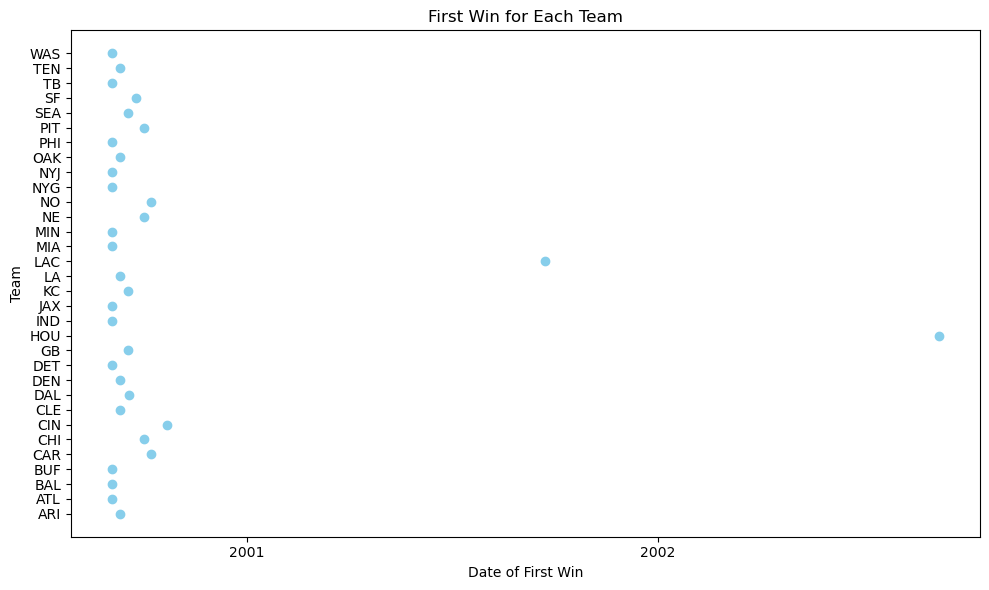

In [55]:
# Find the earliest game where each team won as a home team
home_first_win = result[result['home_score'] > result['away_score']].groupby('home_team')['gameday'].min()

# Find the earliest game where each team won as an away team
away_first_win = result[result['away_score'] > result['home_score']].groupby('away_team')['gameday'].min()

# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(first_wins, first_wins.index, color='skyblue')

# Set plot title and labels
plt.title('First Win for Each Team')
plt.xlabel('Date of First Win')
plt.ylabel('Team')

# Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Show plot
plt.tight_layout()
plt.show()

In [56]:
# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min().reset_index()
first_wins.columns = ['Team', 'First Win']

# Create an interactive scatter plot with Plotly
fig = px.scatter(first_wins, x='First Win', y='Team', hover_data={'First Win': '|%Y-%m-%d'}, color='Team')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(title='First Win for Each Team', xaxis_title='Date of First Win', yaxis_title='Team')
fig.show()


In [57]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

print(wins_per_season)


     season winning_team  wins
0      2000          ARI     3
1      2000          ATL     4
2      2000          BAL    12
3      2000          BUF     8
4      2000          CAR     5
..      ...          ...   ...
625    2019          SEA    10
626    2019           SF     7
627    2019           TB     7
628    2019          TEN     8
629    2019          WAS     3

[630 rows x 3 columns]


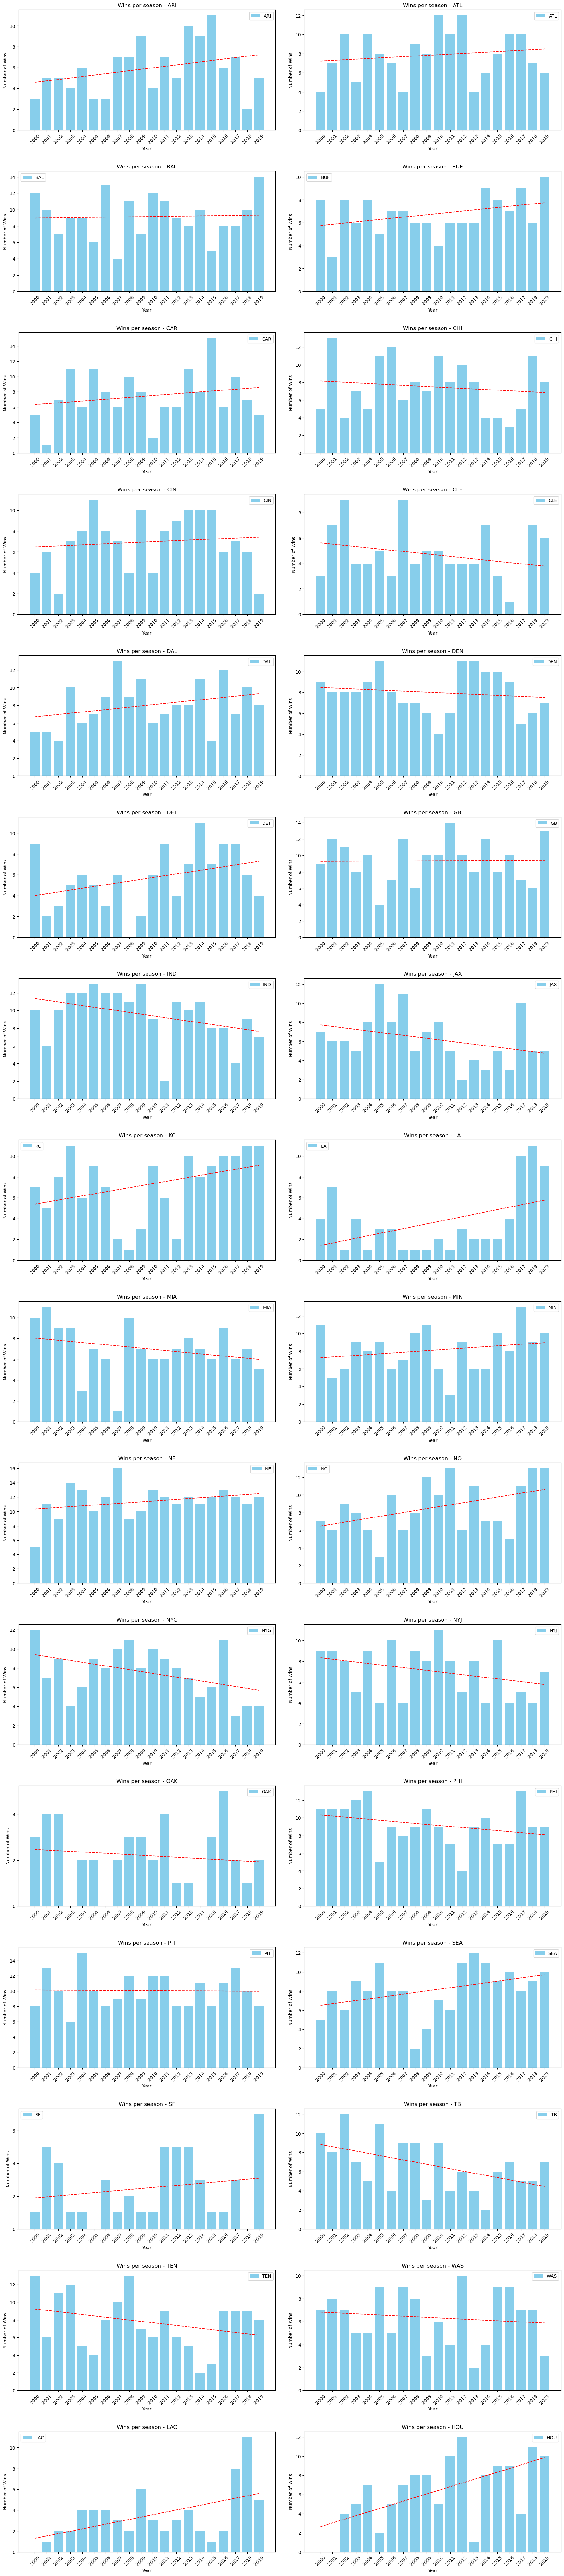

In [58]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Pivot the table to have teams as columns and years as rows
wins_pivot = wins_per_season.pivot(index='season', columns='winning_team', values='wins').fillna(0)

# Plot each team separately
teams = wins_per_season['winning_team'].unique()
num_teams = len(teams)
num_cols = 2  # Number of columns for subplots
num_rows = (num_teams + 1) // num_cols  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    ax.bar(wins_pivot.index, wins_pivot[team], label=team, color='skyblue')
    ax.set_title(f'Wins per season - {team}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Wins')
    ax.legend()

    # Calculate trendline using linear regression
    x = np.array(wins_pivot.index).reshape(-1, 1)
    y = wins_pivot[team].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    trendline = model.predict(x)
    ax.plot(wins_pivot.index, trendline, color='red', linestyle='--', label='Trendline')

    ax.set_xticks(wins_pivot.index)
    ax.set_xticklabels(wins_pivot.index, rotation=45)

    # Set y-ticks to display only even numbers
    y_ticks = np.arange(0, max(wins_pivot[team]) + 1, 2)
    ax.set_yticks(y_ticks)

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()

C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\3722935137.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Birkir\AppData\Local\Temp\ipykernel_32392\3722935137.py:26: UserWarning:

The figure layout has changed to tight



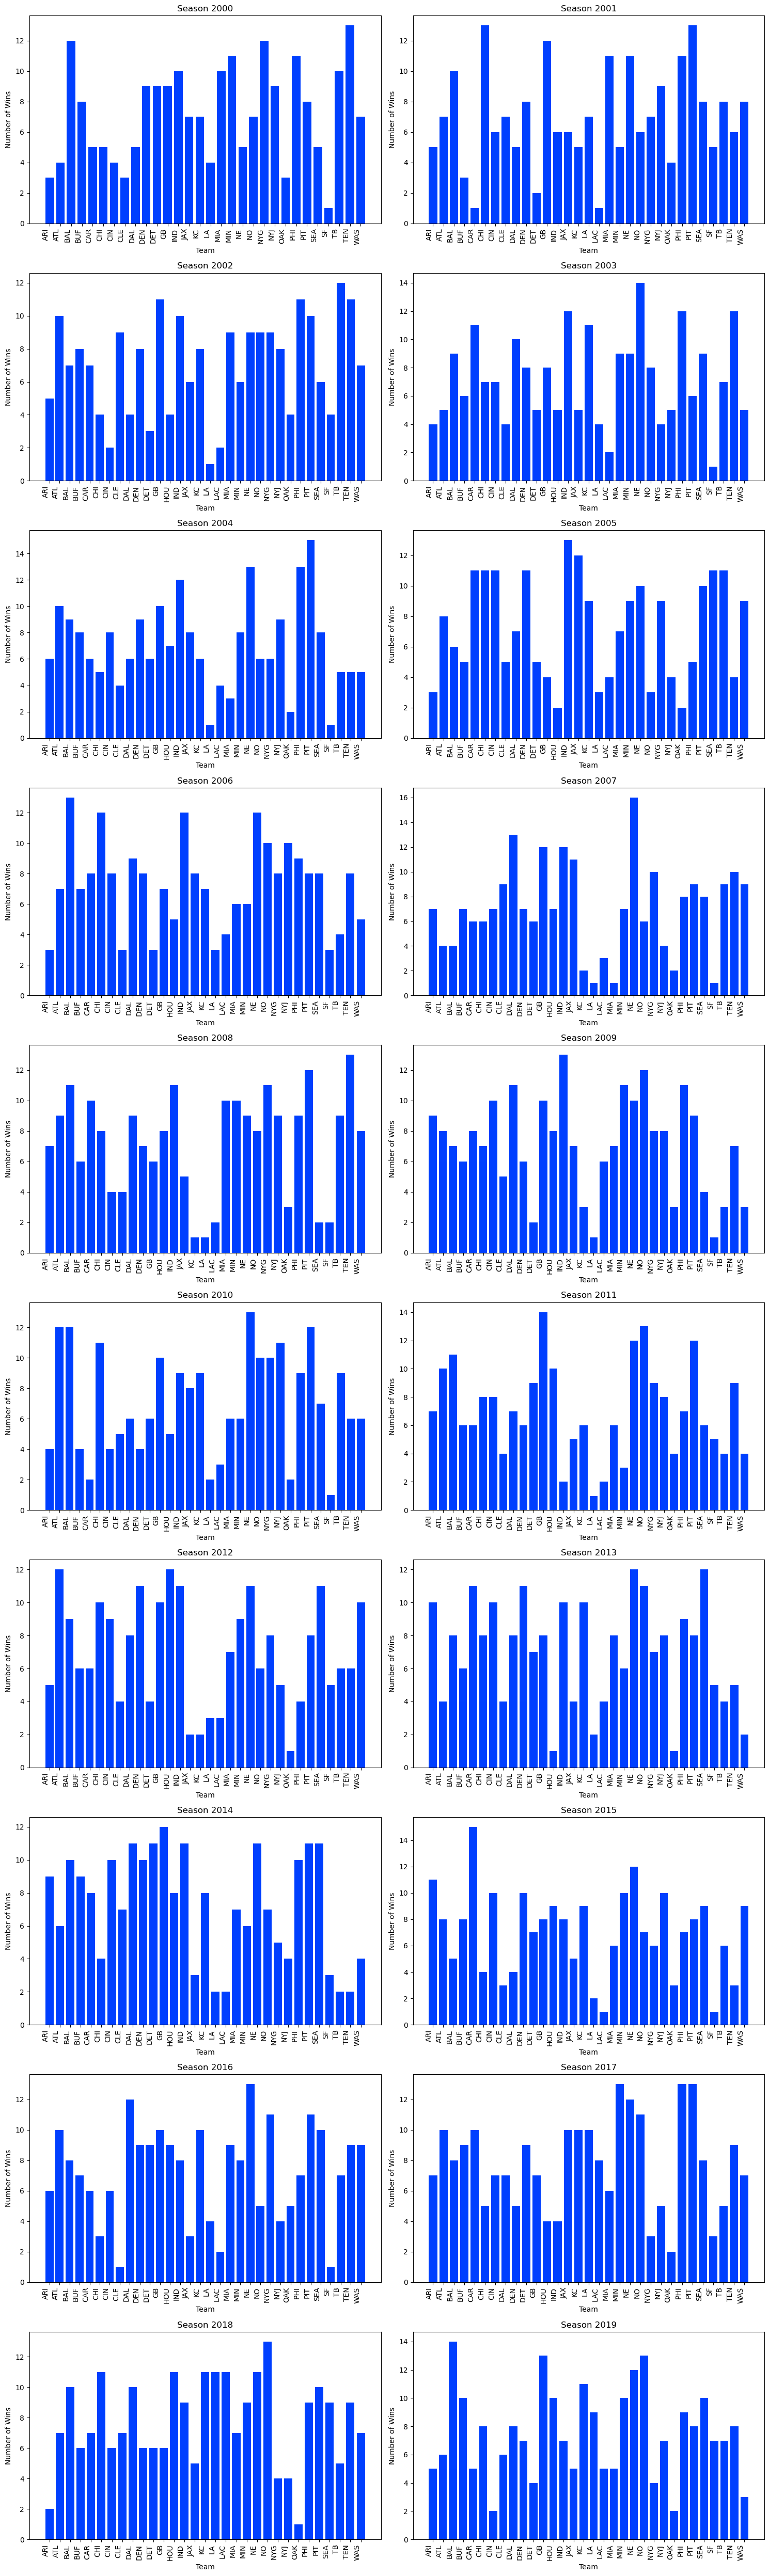

In [59]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Get unique seasons
seasons = wins_per_season['season'].unique()

# Calculate the number of rows needed for subplots
num_rows = len(seasons) // 2 + (len(seasons) % 2 > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate through each season and create a graph
for idx, season in enumerate(seasons):
    season_data = wins_per_season[wins_per_season['season'] == season]
    ax = axes[idx // 2, idx % 2]
    ax.bar(season_data['winning_team'], season_data['wins'])
    ax.set_title(f'Season {int(season)}')
    ax.set_xlabel('Team')
    ax.set_ylabel('Number of Wins')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(season_data['winning_team'], rotation=90, ha='right')
    plt.tight_layout()

# Hide empty subplots
if len(seasons) % 2 != 0:
    for i in range(len(seasons) % 2, 2):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()


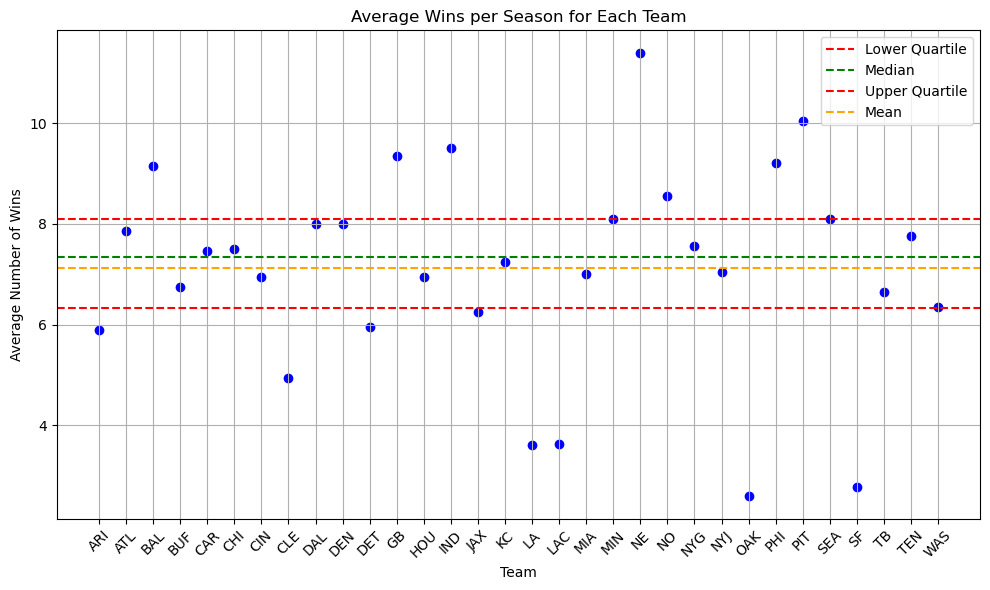

In [60]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Calculate the average number of wins per season for each team
average_wins_per_team = wins_per_season.groupby('winning_team')['wins'].mean().reset_index()

# Calculate quartiles and median
lower_quartile = np.percentile(average_wins_per_team['wins'], 25)
median = np.percentile(average_wins_per_team['wins'], 50)
upper_quartile = np.percentile(average_wins_per_team['wins'], 75)
mean = average_wins_per_team['wins'].mean()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_wins_per_team['winning_team'], average_wins_per_team['wins'], color='blue')
plt.title('Average Wins per Season for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)

# Add quartiles and mean lines
plt.axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
plt.axhline(y=median, color='g', linestyle='--', label='Median')
plt.axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
plt.axhline(y=mean, color='orange', linestyle='--', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()


In [61]:
# Correlation between temperature and weekly attendance
# Calculate correlation matrix
correlation_matrix = result[['temp', 'weekly_attendance']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       temp  weekly_attendance
temp               1.000000          -0.105759
weekly_attendance -0.105759           1.000000


In [62]:
total_wins

NE     228.0
PIT    200.0
IND    190.0
GB     187.0
BAL    183.0
PHI    183.0
NO     171.0
SEA    161.0
DAL    160.0
DEN    160.0
MIN    160.0
ATL    156.0
TEN    155.0
NYG    151.0
CHI    150.0
CAR    148.0
KC     145.0
NYJ    141.0
MIA    140.0
CIN    139.0
BUF    135.0
TB     133.0
WAS    126.0
JAX    125.0
HOU    125.0
ARI    118.0
DET    112.0
CLE     94.0
LA      72.0
LAC     69.0
SF      50.0
OAK     44.0
Name: count, dtype: float64

In [63]:
# Create a DataFrame containing both home and away games
home_games = result.groupby(['season', 'home_team']).size().reset_index(name='home_games_played')
away_games = result.groupby(['season', 'away_team']).size().reset_index(name='away_games_played')

# Merge the home and away game DataFrames on team and season
games_per_season_per_team = pd.merge(home_games, away_games, left_on=['season', 'home_team'], right_on=['season', 'away_team'], how='outer')

# Fill NaN values with 0
games_per_season_per_team = games_per_season_per_team.fillna(0)

# Add the home and away games to get the total games played by each team in each season
games_per_season_per_team['total_games_played'] = (games_per_season_per_team['home_games_played'] + games_per_season_per_team['away_games_played']).astype(int)

# Drop unnecessary columns
games_per_season_per_team = games_per_season_per_team[['season', 'home_team', 'total_games_played']]

# Rename columns for consistency
games_per_season_per_team.rename(columns={'home_team': 'team_abbr'}, inplace=True)

# Display the result
print(games_per_season_per_team)

     season team_abbr  total_games_played
0      2000       ARI                  15
1      2000       ATL                  13
2      2000       BAL                  16
3      2000       BUF                  16
4      2000       CAR                  13
..      ...       ...                 ...
633    2017         0                   8
634    2018         0                   7
635    2018         0                   8
636    2019         0                   8
637    2019         0                   8

[638 rows x 3 columns]


In [64]:
games_per_season_per_team.iloc[-75:]

,season,team_abbr,total_games_played
563,2019,TEN,15
564,2019,WAS,16
565,2000,0,7
566,2000,0,6
567,2000,0,6
...,...,...,...
633,2017,0,8
634,2018,0,7
635,2018,0,8
636,2019,0,8


Afhverju eru sum Abbr 0????????

In [65]:
# Create a DataFrame containing both home and away games
home_games = result.groupby(['season', 'home_team']).size().reset_index(name='home_games_played')
away_games = result.groupby(['season', 'away_team']).size().reset_index(name='away_games_played')

# Merge the home and away game DataFrames on team and season
games_per_season_per_team = pd.merge(home_games, away_games, left_on=['season', 'home_team'], right_on=['season', 'away_team'], how='outer')

# Fill NaN values with 0
games_per_season_per_team = games_per_season_per_team.fillna(0)

# Add the home and away games to get the total games played by each team in each season
games_per_season_per_team['total_games_played'] = (games_per_season_per_team['home_games_played'] + games_per_season_per_team['away_games_played']).astype(int)

# Drop unnecessary columns
games_per_season_per_team = games_per_season_per_team[['season', 'home_team', 'total_games_played']]

# Rename columns for consistency
games_per_season_per_team.rename(columns={'home_team': 'team_abbr'}, inplace=True)

# Calculate total number of wins for each team in each season
total_wins_per_team_season = result.groupby(['season', 'winning_team']).size().reset_index(name='total_wins')

# Merge total wins with total games played
team_season_stats = pd.merge(games_per_season_per_team, total_wins_per_team_season, left_on=['season', 'team_abbr'], right_on=['season', 'winning_team'], how='left')

# Calculate win percentage for each team in each season
team_season_stats['win_percentage'] = (team_season_stats['total_wins'] / team_season_stats['total_games_played']) * 100

# Drop redundant columns
team_season_stats.drop(columns=['winning_team'], inplace=True)

# Display the result
print(team_season_stats)

     season team_abbr  total_games_played  total_wins  win_percentage
0      2000       ARI                  15         3.0       20.000000
1      2000       ATL                  13         4.0       30.769231
2      2000       BAL                  16        12.0       75.000000
3      2000       BUF                  16         8.0       50.000000
4      2000       CAR                  13         5.0       38.461538
..      ...       ...                 ...         ...             ...
633    2017         0                   8         NaN             NaN
634    2018         0                   7         NaN             NaN
635    2018         0                   8         NaN             NaN
636    2019         0                   8         NaN             NaN
637    2019         0                   8         NaN             NaN

[638 rows x 5 columns]


In [66]:
team_season_stats[:30]

,season,team_abbr,total_games_played,total_wins,win_percentage
0,2000,ARI,15,3.0,20.000000
1,2000,ATL,13,4.0,30.769231
2,2000,BAL,16,12.0,75.000000
3,2000,BUF,16,8.0,50.000000
4,2000,CAR,13,5.0,38.461538
5,2000,CHI,15,5.0,33.333333
6,2000,CIN,16,4.0,25.000000
7,2000,CLE,15,3.0,20.000000
8,2000,DAL,16,5.0,31.250000
9,2000,DEN,13,9.0,69.230769


In [67]:
# Filter rows where home_score equals away_score
equal_scores = result[result['home_score'] == result['away_score']]

# Display the result
equal_scores

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,Team,longitude,latitude,home_qb_name,away_qb_name,home_coach,away_coach,winning_team,home_team_win,stadium_name
915,2013_12_MIN_GB,2013,12,2013-11-24,Sunday,10.0,19.0,GB,MIN,26.0,...,Packers,-88.062167,44.501306,Scott Tolzien,Christian Ponder,Mike McCarthy,Leslie Frazier,MIN,False,GB Stadium
951,2018_02_MIN_GB,2018,2,2018-09-16,Sunday,5.0,80.0,GB,MIN,29.0,...,Packers,-88.062167,44.501306,Aaron Rodgers,Kirk Cousins,Mike McCarthy,Mike Zimmer,MIN,False,GB Stadium
1953,2002_10_ATL_PIT,2002,10,2002-11-10,Sunday,15.0,64.0,PIT,ATL,34.0,...,Steelers,-80.015761,40.446786,Tommy Maddox,Michael Vick,Bill Cowher,Dan Reeves,ATL,False,PIT Stadium
2559,2018_01_PIT_CLE,2018,1,2018-09-09,Sunday,11.0,58.0,CLE,PIT,21.0,...,Browns,-81.699564,41.506022,Tyrod Taylor,Ben Roethlisberger,Hue Jackson,Mike Tomlin,PIT,False,CLE Stadium
3443,2008_11_PHI_CIN,2008,11,2008-11-16,Sunday,15.0,38.0,CIN,PHI,13.0,...,Bengals,-84.516039,39.095442,Ryan Fitzpatrick,Donovan McNabb,Marvin Lewis,Andy Reid,PHI,False,CIN Stadium
3489,2014_06_CAR_CIN,2014,6,2014-10-12,Sunday,5.0,60.0,CIN,CAR,37.0,...,Bengals,-84.516039,39.095442,Andy Dalton,Cam Newton,Marvin Lewis,Ron Rivera,CAR,False,CIN Stadium
3506,2016_08_WAS_CIN,2016,8,2016-10-30,Sunday,2.0,54.0,CIN,WAS,27.0,...,Bengals,-84.516039,39.095442,Andy Dalton,Kirk Cousins,Marvin Lewis,Jay Gruden,WAS,False,CIN Stadium
4307,2016_07_SEA_ARI,2016,7,2016-10-23,Sunday,NaN,NaN,ARI,SEA,6.0,...,Cardinals,-112.262608,33.527700,Carson Palmer,Russell Wilson,Bruce Arians,Pete Carroll,SEA,False,ARI Stadium
4327,2019_01_DET_ARI,2019,1,2019-09-08,Sunday,NaN,NaN,ARI,DET,27.0,...,Cardinals,-112.262608,33.527700,Kyler Murray,Matthew Stafford,Kliff Kingsbury,Matt Patricia,DET,False,ARI Stadium


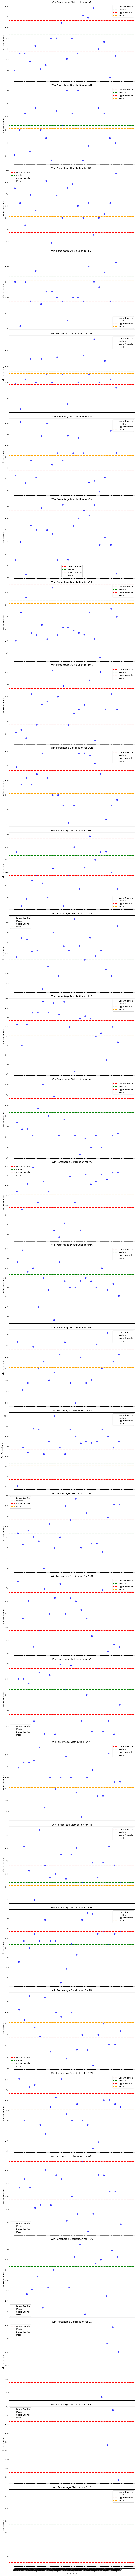

In [68]:
# Get unique team abbreviations
teams = team_season_stats['team_abbr'].unique()

# Calculate quartiles and mean
lower_quartile = team_season_stats['win_percentage'].quantile(0.25)
median = team_season_stats['win_percentage'].quantile(0.5)
upper_quartile = team_season_stats['win_percentage'].quantile(0.75)
mean = team_season_stats['win_percentage'].mean()

# Create subplots for each team
fig, axs = plt.subplots(len(teams), 1, figsize=(10, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    team_data = team_season_stats[team_season_stats['team_abbr'] == team]
    axs[i].scatter(team_data.index, team_data['win_percentage'], color='blue', s=50, alpha=0.7)
    axs[i].set_title(f'Win Percentage Distribution for {team}')
    axs[i].set_ylabel('Win Percentage')
    axs[i].axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
    axs[i].axhline(y=median, color='g', linestyle='--', label='Median')
    axs[i].axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
    axs[i].axhline(y=mean, color='orange', linestyle='--', label='Mean')
    axs[i].legend()

plt.xlabel('Team Index')
plt.xticks(range(len(team_season_stats)), team_season_stats['team_abbr'], rotation=45)
plt.tight_layout()
plt.show()